### AMAZON SALES DATA ANALYSIS

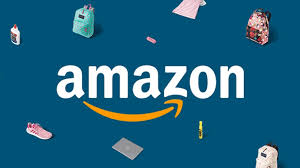
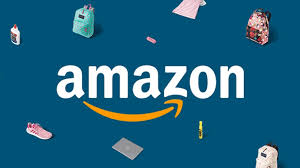

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Amazon Sale Report.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df= df.drop(df.columns[-1],axis=1) 
df = df.drop('index', axis = 1) 

In [ ]:
df.head(3)

In [ ]:
df.describe()

In [ ]:
df[df.duplicated()] 

In [ ]:
df = (df.drop_duplicates(keep='first').reset_index(drop=True)) # removed

In [ ]:
df.isna().sum() 

In [ ]:
have_null_coll = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country','promotion-ids']
for i in have_null_coll:
    mode = df[i].mode()[0]
    df[i] = df[i].fillna(mode)
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [ ]:
df.isna().sum() # now 0 missing value

In [ ]:
IQR = df['Amount'].quantile(0.75) - df['Amount'].quantile(0.25)
1.5*IQR
upper_bound = df['Amount'].quantile(0.75) + 1.5*IQR   
lower_bound = df['Amount'].quantile(0.25) - 1.5*IQR 
Median = df['Amount'].median()
df['Amount'] = df['Amount'].apply(lambda x: Median if x > upper_bound  or x < lower_bound else x) 

In [ ]:
df['Amount'] = df['Amount'].apply(lambda x: Median if x == 0 else x) 

In [ ]:
fig, my_ax = plt.subplots(figsize=(8,5))

sns.histplot(data = df['Amount'], ax=my_ax, binwidth=100, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()

#####  Here we can see that most of the sells between 400-600 ₹ 

In [ ]:
Top5_Trending_product=df.groupby('Category')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(5)

In [ ]:
Top5_Trending_product

In [ ]:
Top5_Trending_product.plot(kind='bar',color='#f0bda7')
plt.title('Total Amount by Category', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##### Here the top 5 most selling product in Amazon 

In [ ]:
Top5_cities_orderfrom_Amazon=df.groupby('ship-city')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(5)

In [ ]:
Top5_cities_orderfrom_Amazon

In [ ]:
Top5_cities_orderfrom_Amazon.plot(kind='bar',color='#a3fafb')
plt.title('Top 5 cities order from Amazon', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--',color='#000000', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##### Here are the top 5 cities order from Amazon

In [ ]:
Total_Qty_ordered = df['Qty'].sum()

In [ ]:
Total_Sales = df['Amount'].sum()

In [ ]:
Sales_Order_wise = df.groupby('Order ID').agg({'Qty': 'count', 'Amount': 'sum', 'Status': 'sum', 'Fulfilment': 'sum', 'ship-service-level': 'sum', 'ship-service-level': 'sum', 'Style': 'sum', 'SKU': 'sum', 'Category': 'sum', 'ship-city': 'sum', 'ship-state': 'sum', 'B2B': 'sum', 'promotion-ids': 'sum'})

In [ ]:
Sales_Order_wise

In [ ]:
Top5_seller_by_qt=Sales_Order_wise.sort_values(by='Qty', ascending = False).head(5)

In [ ]:
Top5_seller_by_qt

In [ ]:
_, my_ax = plt.subplots(figsize=(8, 5))
Top5_seller_by_qt.plot(kind='bar', ax=my_ax, width=0.4)
plt.xticks(rotation=1, fontsize=10)
plt.grid(linestyle='--',color='#000000')
plt.title("Top 5 Orders By Quantity", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [ ]:
Top5_orderby_amount=Sales_Order_wise.sort_values(by='Amount', ascending = False).head(5)

In [ ]:
Top5_orderby_amount

In [ ]:
_, my_ax = plt.subplots(figsize=(8, 5))
Top5_orderby_amount.plot(kind='bar', ax=my_ax, width=0.4,color='#b6fb82')
plt.xticks(rotation=1, fontsize=10)
#plt.grid(color='#000000')
plt.title("Top 5 Orders By Amount", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df.head(3)

In [ ]:
Orders_date_wise = df.groupby('Date').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Amount', ascending = False).head(5)

In [ ]:
Orders_date_wise

##### Top 5 selling date 

In [ ]:
Orders_qt=df.groupby('Date').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Qty', ascending = False).head(5)

In [ ]:
Orders_qt

##### Top 5 quantity ordered by user

In [ ]:
order_status=df.groupby('Status').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Qty', ascending = False)

In [ ]:
order_status

In [ ]:
_, my_ax = plt.subplots(figsize=(8, 5))
order_status.plot(kind='bar', ax=my_ax, width=0.4)
plt.xticks(rotation=1, fontsize=10)
#plt.grid()
plt.title("All Order Status", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [ ]:
Sales_month_wise = df.groupby('Month').agg({'Amount': 'sum', 'Qty': 'sum'})
Sales_month_wise

In [ ]:

Sales_month_wise.plot(kind='line',color='#f0bda7')
plt.title('Monthly sales', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Sales_percentage_by_fulfilment = (df.groupby('Fulfilment').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Amount', ascending = False)['Amount']/81352807.57)*100
Sales_percentage_by_fulfilment

In [ ]:
Sales_percentage_by_fulfilment.plot(kind='pie')
plt.tight_layout()